In [ ]:
"""
Simple linear regression from a CSV file. Users need to provide a csv file with the data needed.

Prompts for a CSV path and X/Y columns, fits a line (y = m*x + b),
prints slope/intercept/R^2, and plots data with the fitted line.

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Inputs:
CSV file: C:/Users/jclabarcena/Documents/ATM523/study_hours_scores.csv
X column: Hours_Studied
Y column: Exam_Score

Linear Regression Results:
Slope: 4.5636
Intercept: 47.2000
R-squared: 0.9977


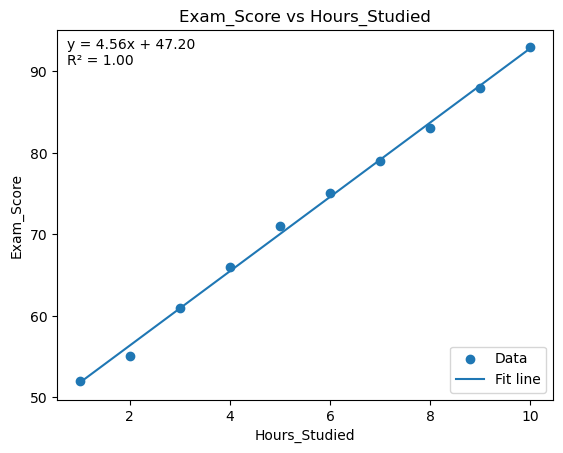

In [ ]:

# --- User inputs ---
csv_path = "C:/Users/jclabarcena/Documents/ATM523/study_hours_scores.csv"
x_col = "Hours_Studied"
y_col = "Exam_Score"

# --- Load data ---
df = pd.read_csv(csv_path)
x = df[x_col].values
y = df[y_col].values

# --- Linear regression ---
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

# --- R-squared ---
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# --- Print results ---
print("Inputs:")
print(f"CSV file: {csv_path}")
print(f"X column: {x_col}")
print(f"Y column: {y_col}\n")

print("Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")

# --- Plot ---
fig, ax = plt.subplots()
ax.scatter(x, y, label="Data")
ax.plot(x, y_pred, label="Fit line")

# Put equation text in the top-left of the axes for consistent placement
ax.text(
    0.02,
    0.98,
    f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}",
    transform=ax.transAxes,
    va="top",
)

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title(f"{y_col} vs {x_col}")
ax.legend()

#Save plot as a figure
plt.savefig("regression_plot.png", dpi=300)

plt.show()


In [ ]:
#Saving Results in a text file
with open("regression_results.txt", "w") as f:
    f.write(f"Slope: {slope:.4f}\n")
    f.write(f"Intercept: {intercept:.4f}\n")
    f.write(f"R-squared: {r_squared:.4f}\n")


Predictions:
X = 15.00 -> Predicted Y = 100.00
X = 17.00 -> Predicted Y = 100.00


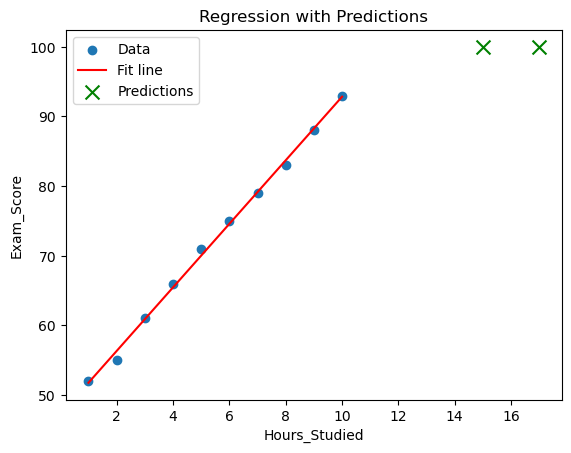

In [17]:
"""
Predict new values using the regression equation
and plot them alongside the regression line.
"""

def predict_scores(x_values, slope, intercept):
    """
    Predict scores using the regression equation.

    Parameters:
        x_values (list): List of X values.
        slope (float): Regression slope.
        intercept (float): Regression intercept.

    Returns:
        list: Predicted Y values.
    """
    return [slope * val + intercept for val in x_values]

# --- User input for new values ---
new_x_values = 15, 17
new_x = [float(val) for val in new_x_values]

# --- Predict using regression equation ---
new_y = [min(slope * val + intercept, 100) for val in new_x]


# --- Predict using regression equation (no cap) ---
#Uncomment this line if the data used doesn't have a cap
#new_y = [slope * val + intercept for val in new_x]

# --- Print predictions ---
print("\nPredictions:")
for x_val, y_val in zip(new_x, new_y):
    print(f"X = {x_val:.2f} -> Predicted Y = {y_val:.2f}")

# --- Plot with predictions highlighted ---
fig, ax = plt.subplots()
ax.scatter(x, y, label="Data")
ax.plot(x, y_pred, color="red", label="Fit line")
ax.scatter(new_x, new_y, color="green", s=100, marker="x",
           label="Predictions")

ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title("Regression with Predictions")
ax.legend()
plt.show()